### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
data.tail(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1
12678,Home,Partner,Sunny,30,10PM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [7]:
# Quick statistical analisys of the data
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Inspect columns and values
data.info()

# We have to deal with some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
# Check counts for nulls
null_values = data.loc[:, data.isna().any()]
null_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car                   108 non-null    object
 1   Bar                   12577 non-null  object
 2   CoffeeHouse           12467 non-null  object
 3   CarryAway             12533 non-null  object
 4   RestaurantLessThan20  12554 non-null  object
 5   Restaurant20To50      12495 non-null  object
dtypes: object(6)
memory usage: 594.7+ KB


In [10]:
# Check the different values in the dataset
for col in data.columns:
    print(data[col].value_counts())
    print("================")


# Need to figure out how to deal with age when value is 50plus or below21
# Need to figuer out how to deal with income ranges
# All values in toCupon_GEQ5min are 1

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
expiration
1d    7091
2h    5593
Name: count, dtype: int64
gender
Female    6511
Male      6173
Name: count, dtype: int64
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
maritalStatus
Married partner      5100
Single               4752
Unmarri

In [11]:
for col in null_values.columns:
    print(null_values[col].value_counts())
    print("================")

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# How important is the car column? There are many missing values and I'm not sure the value it provides to the data
# I think we can just drop the data. The car column doesn't seem important and there are only a few missing values in the other columns with missing values

# Remove the car column from the dataset
data_no_car_column = data.drop(columns=["car"])
data_no_car_column

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [13]:
# Replace carry away nans with never?
# We can use all the data in the data set if we assume NaN is never.
# Better just drop values; we won't lose that much data and will prevent assumptions
no_null_values_df = data_no_car_column.dropna()
no_null_values_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [14]:
accepted_cupon = no_null_values_df.loc[no_null_values_df["Y"] == 1]["Y"].count() / len(no_null_values_df)
accepted_cupon

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

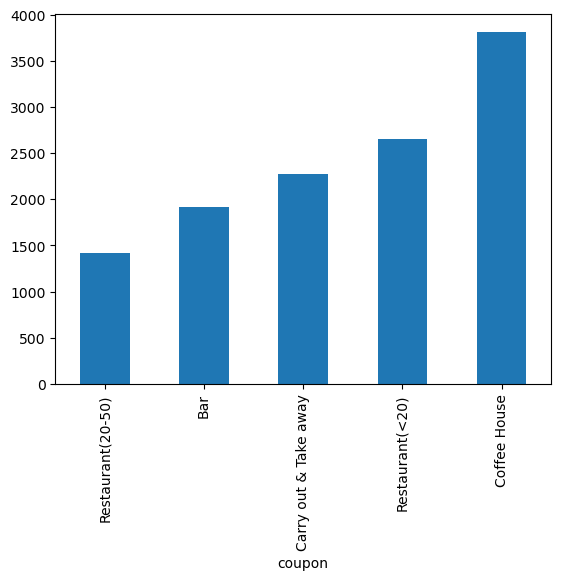

In [15]:
no_null_values_df['coupon'].value_counts().sort_values().plot.bar()

6. Use a histogram to visualize the temperature column.

<Axes: >

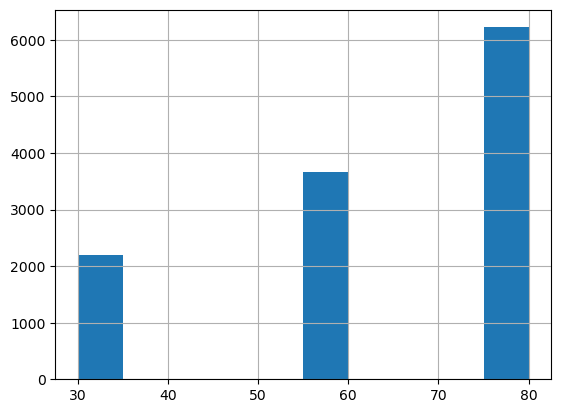

In [18]:
no_null_values_df["temperature"].hist()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
bar_coupons_df = no_null_values_df.loc[no_null_values_df["coupon"] == "Bar"]
bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [28]:
bar_coupons_accepted_df = bar_coupons_df.loc[bar_coupons_df["Y"] == 1]
# bar_coupons_accepted_df
accepted_given_bar_rate = len(bar_coupons_accepted_df)/len(bar_coupons_df)
accepted_given_bar_rate


0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [98]:
three_or_fewer_list = ["never","less1", "1~3"]
bar_three_or_fewer_df = bar_coupons_df.query("Bar in @three_or_fewer_list")
bar_three_or_fewer_accepted_df = bar_three_or_fewer_df.query("Y == 1")
bar_three_or_fewer_accepted_rate = len(bar_three_or_fewer_accepted_df)/len(bar_three_or_fewer_df)
bar_three_or_fewer_accepted_rate


0.37267441860465117

In [99]:
four_or_more_list = ["4~8","gt8"]
bar_four_or_more_df = bar_coupons_df.query("Bar in @four_or_more_list")
bar_four_or_more_accepted_df = bar_four_or_more_df.query("Y == 1")
bar_four_or_more_accepted_rate = len(bar_four_or_more_accepted_df)/len(bar_four_or_more_df)
bar_four_or_more_accepted_rate

0.7616580310880829

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [100]:
more_than_once_list = ["1~3", "4~8", "gt8"]
under_25_list = ["21","below21"]
bar_more_than_once_df = bar_coupons_df.query("Bar in @more_than_once_list and Y == 1")
bar_more_than_once_over_25_df = bar_more_than_once_df.query("not age in @under_25_list")
bar_more_than_once_over_25_rate = len(bar_more_than_once_over_25_df)/len(bar_more_than_once_df)
bar_more_than_once_over_25_rate

0.7091836734693877

In [101]:
more_than_once_list = ["1~3", "4~8", "gt8"]
under_25_list = ["21","below21"]
bar_more_than_once_df = bar_coupons_df.query("Bar in @more_than_once_list and Y == 1")
bar_more_than_once_under_25_df = bar_more_than_once_df.query("age in @under_25_list")
bar_more_than_once_under_25_rate = len(bar_more_than_once_under_25_df)/len(bar_more_than_once_df)
bar_more_than_once_under_25_rate

0.29081632653061223

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [109]:
more_than_once_list = ["1~3", "4~8", "gt8"]
kids_list = ["Kid(s)"]
farming_list = ["Farming Fishing & Forestry"]

bar_more_than_once_df = bar_coupons_df.query("Bar in @more_than_once_list and Y == 1")
bar_more_than_once_no_kids_no_farming_df = bar_more_than_once_df.query("not passanger in @kids_list and occupation != 'Farming Fishing & Forestry'")
bar_more_than_once_no_kids_no_farming_rate = len(bar_more_than_once_no_kids_no_farming_df)/len(bar_more_than_once_df)
bar_more_than_once_no_kids_no_farming_rate

0.9591836734693877

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [110]:
more_than_once_list = ["1~3", "4~8", "gt8"]
kids_list = ["Kid(s)"]
widowed_list = ["Widowed"]
bar_more_than_once_df = bar_coupons_df.query("Bar in @more_than_once_list and Y == 1")
bar_more_than_once_no_kids_no_widowed_df = bar_more_than_once_df.query("not passanger in @kids_list and maritalStatus != 'Widowed'")
bar_more_than_once_no_kids_no_widowed_rate = len(bar_more_than_once_no_kids_no_widowed_df)/len(bar_more_than_once_df)
bar_more_than_once_no_kids_no_widowed_rate

0.9591836734693877

In [104]:
more_than_once_list = ["1~3", "4~8", "gt8"]
under_30_list = ["below21","21","26"]

bar_more_than_once_df = bar_coupons_df.query("Bar in @more_than_once_list and Y == 1")
bar_more_than_once_under_30_df = bar_more_than_once_df.query("age in @under_30_list")
bar_more_than_once_under_30_rate = len(bar_more_than_once_under_30_df)/len(bar_more_than_once_df)
bar_more_than_once_under_30_rate

0.6020408163265306

In [97]:
more_than_4_list = ["4~8", "gt8"]
income_less_than_50k_list = ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]

cheap_restaurant_more_than_4_df = bar_coupons_df.query("RestaurantLessThan20 in @more_than_4_list and Y == 1")
cheap_restaurant_more_than_4_less_than_50k_df = cheap_restaurant_more_than_4_df.query("income in @income_less_than_50k_list")
cheap_restaurant_more_than_4_less_than_50k_rate = len(cheap_restaurant_more_than_4_less_than_50k_df)/len(cheap_restaurant_more_than_4_df)
cheap_restaurant_more_than_4_less_than_50k_rate

0.48253968253968255

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Drivers who were driving alone and were not widowed like to use bar coupons
# Drivers under 30 prefer to do other things rather than going to a bar to use a coupon
# Drivers with lower income are not necessarily intersted in using bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  